## Importing Packages

In [1]:
import pandas as pd
import numpy as np
from seaborn import load_dataset

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## loading dataset

In [3]:
# import the titanic data

df = load_dataset(name='titanic')

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
print('The shape of the df before removing the target column',df.shape)

The shape of the df before removing the target column (891, 15)


## Making the input and the target variables

In [5]:
# make the target y

y = df['survived']

# remove the target column from the data

df_temp = df.drop(columns='survived')

print('The shape of the df after removing the target column',df.shape)

The shape of the df after removing the target column (891, 15)


In [6]:
# check for missing values in the data

df_temp.isna().mean() * 100    #missing values in percentages

pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

**The complete case analysis can only be performed on the embarked column**

> To do the comparitive analysis we will also perform the CCA on the age column which has around 20% of the values missing.

## Subset of data for analysis

In [7]:
# select the columns of the df

test_df = df_temp[['age','embarked','fare','sex','pclass']]

test_df.head()

,age,embarked,fare,sex,pclass
0,22.0,S,7.2500,male,3
1,38.0,C,71.2833,female,1
2,26.0,S,7.9250,female,3
3,35.0,S,53.1000,female,1
4,35.0,S,8.0500,male,3


## Introduction

<div style="background-color: #e6ffe6; padding: 10px;">
Complete case analysis, also known as listwise deletion, is a data imputation technique used to handle missing values in a dataset.
    
Only complete cases, i.e., observations without any missing values, are considered for the analysis, and the rest are discarded.
    
Complete case analysis (CCA) is a data imputation method that involves excluding cases with missing data from the analysis. This means that only **cases with complete data on all variables of interest are included in the analysis**.

CCA is a simple and straightforward method, but it **can be biased if the missing data are not missing completely at random (MCAR)**. MCAR means that the probability of a value being missing is not related to any of the other variables in the data set. If the missing data are not MCAR, then CCA can lead to biased estimates of the parameters of interest.

For example, suppose we are interested in the relationship between smoking and lung cancer. If we use CCA to analyze a data set of smokers, and we find that there is a positive association between smoking and lung cancer, then we cannot be sure whether this association is causal. It is possible that the missing data are not MCAR, and that the people who are missing data on smoking are more likely to have lung cancer. In this case, CCA would lead to an overestimate of the association between smoking and lung cancer.
</div>

**In Complete Case Analysis, you remove entire observations (rows) that have missing values in any of the variables of interest.**

## Advantages and Disadvantages of using CCA

### Advantages

<div style="background-color: #e6f7ff; padding: 10px;">
Advantages of Complete Case Analysis (CCA):

1. Simplicity: CCA is easy to implement as it involves excluding observations with missing values without any further manipulation.

2. No imputation required: CCA does not require imputing or estimating missing values, making it useful when imputation methods are not readily available or applicable.

3. Preserves observed relationships: CCA does not alter the relationships between variables in the original observed data.

</div>

### Disadvantages

<div style="background-color: #ffe6e6; padding: 10px;">

Disadvantages of Complete Case Analysis (CCA):

1. Loss of information: CCA removes observations with missing values, leading to a reduction in sample size and potential loss of valuable information, possibly resulting in biased estimates.

2. Biased results: If the missing data is not missing completely at random (MCAR) and is related to the variables under study, CCA can introduce bias into the analysis.

3. Reduced statistical power: With a reduced sample size, the statistical power of the analysis might be diminished, making it less likely to detect significant effects or associations.
</div>

### What is Data completely missing at Random

<div style="background-color: #ffe0cc; padding: 10px;">
Data missing completely at random (MCAR) is a type of missing data in which the probability of a value being missing is independent of both the observed and unobserved values. In other words, the missing data are not related to any of the other variables in the dataset.

For example, if a survey question is accidentally skipped by some respondents, but not others, the data would be considered MCAR. This is because the probability of skipping the question is not related to any of the other variables in the survey, such as the respondent's age, gender, or income.

MCAR is the least problematic type of missing data, as it does not introduce any systematic bias into the analysis. However, it is also the rarest type of missing data. In most cases, missing data is either missing at random (MAR) or missing not at random (MNAR).

Here are some examples of data missing completely at random:

* Data that is lost or damaged due to chance.
* Data that is skipped by respondents due to fatigue or boredom.
* Data that is not collected due to a technical error.

It is important to note that MCAR is a theoretical concept, and it is rarely possible to prove that data is truly MCAR. However, if there is no evidence to suggest that the missing data is related to any of the other variables in the dataset, then it is reasonable to assume that the data is MCAR.

If the data is MCAR, then the most common approach to dealing with missing data is to simply ignore the missing values. This is because the missing values are not related to any of the other variables in the dataset, so they will not introduce any systematic bias into the analysis.

However, if the missing data is not MCAR, then ignoring the missing values may introduce bias into the analysis. In this case, it may be necessary to use more complex methods to deal with the missing data, such as multiple imputation or weighting.
</div>


**As a general rule, if the proportion of missing data is relatively small (e.g., less than 5% of the total data), removing those observations may not significantly impact the results or statistical analyses**

## Check for which columns missing data is MCAR

In [8]:
# rows of data missing in each column

print('Rows of data missing in the age column',test_df['age'].isna().sum())

print('Rows of data missing in the embarked column',test_df['embarked'].isna().sum())

Rows of data missing in the age column 177
Rows of data missing in the embarked column 2


In [11]:
# ratio of the data missing from the embarked column

# for passengers who survived the accident
survived_df = df[df['survived'] == 1]['embarked']

ratio_missing_embarked = survived_df.isna().sum() / survived_df.shape[0]
ratio_present_embarked = survived_df.dropna().shape[0] / survived_df.shape[0]

print('The ratio of missing values that survived',ratio_missing_embarked)
print('The ratio of not missing values that survived',ratio_present_embarked)

The ratio of missing values that survived 0.005847953216374269
The ratio of not missing values that survived 0.9941520467836257


In [12]:
# check the spread of data missing from the embarked column

# for passengers who survived the accident
not_survived_df = df[df['survived'] == 0]['embarked']

ratio_missing_embarked = not_survived_df.isna().sum() / not_survived_df.shape[0]
ratio_present_embarked = not_survived_df.dropna().shape[0] / not_survived_df.shape[0]

print('The ratio of missing values that did not survive',ratio_missing_embarked)
print('The ratio of not missing values that did not survive',ratio_present_embarked)

The ratio of missing values that did not survive 0.0
The ratio of not missing values that did not survive 1.0


**The data for the embarked column is missing for those passengers who survived and the ratio is also not affected much by the target**

- This clearly shows that those two data points might have been missed at random or those two people might not want to share the details.

In [17]:
# the two data rows missing for the embarked column

df_temp[test_df['embarked'].isna()]

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [9]:
# check the spread of data missing from the age column

# for passengers who survived the accident
survived_df = df[df['survived'] == 1]['age']

ratio_missing_age = survived_df.isna().sum() / survived_df.shape[0]
ratio_present_age = survived_df.dropna().shape[0] / survived_df.shape[0]

print('The ratio of missing values that survived',ratio_missing_age)
print('The ratio of not missing values that survived',ratio_present_age)


The ratio of missing values that survived 0.15204678362573099
The ratio of not missing values that survived 0.847953216374269


In [10]:
# check the spread of data missing from the age column

# for passengers who survived the accident
not_survived_df = df[df['survived'] == 0]['age']

ratio_missing_age = not_survived_df.isna().sum() / not_survived_df.shape[0]
ratio_present_age = not_survived_df.dropna().shape[0] / not_survived_df.shape[0]

print('The ratio of missing values that did not survive',ratio_missing_age)
print('The ratio of not missing values that did not survive',ratio_present_age)


The ratio of missing values that did not survive 0.22768670309653916
The ratio of not missing values that did not survive 0.7723132969034608


**From the above data it can be clearly observed that the data for the embarked column is missing completely at random and is not missing completely at random(MCAR) for the age column and depends on the target column.**

## Drop missing rows of the embarked column

In [18]:
# perform CCA on the embarked column

embarked = test_df.dropna(subset='embarked')

embarked

,age,embarked,fare,sex,pclass
0,22.0,S,7.2500,male,3
1,38.0,C,71.2833,female,1
2,26.0,S,7.9250,female,3
3,35.0,S,53.1000,female,1
4,35.0,S,8.0500,male,3
...,...,...,...,...,...
886,27.0,S,13.0000,male,2
887,19.0,S,30.0000,female,1
888,NaN,S,23.4500,female,3
889,26.0,C,30.0000,male,1


In [19]:
# proportion of values before removing missing values

test_df['embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: embarked, dtype: float64

In [20]:
# proportion of values after removing missing values

embarked['embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: embarked, dtype: float64

In [21]:
# proportion of sex column before removing missing values

test_df['sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: sex, dtype: float64

In [22]:
# proportion of values after removing missing values

embarked['sex'].value_counts(normalize=True)

male      0.649044
female    0.350956
Name: sex, dtype: float64

**There is no evidence of a substantial change in the proportion of the data**

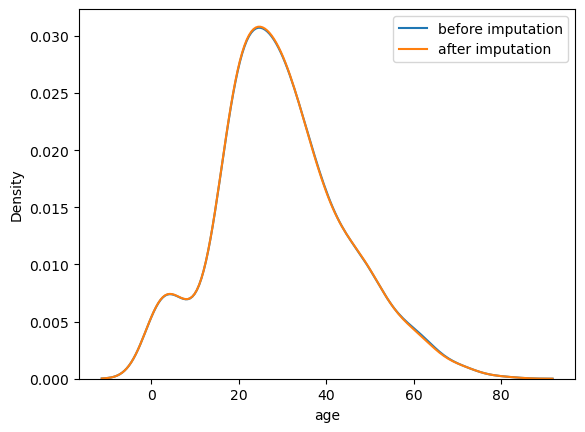

In [23]:
# distribution of age column before and after removing the rows containing missing values in the embarked column

# plot the first kde plot
sns.kdeplot(data=test_df,x='age',label='before imputation')

# plot the second kde plot
sns.kdeplot(data=embarked,x='age',label='after imputation')

plt.legend()
plt.show()

**The number of rows dropped from the data is very less and also the data was MCAR, it does not change the distribution of other columns, such as the age column**

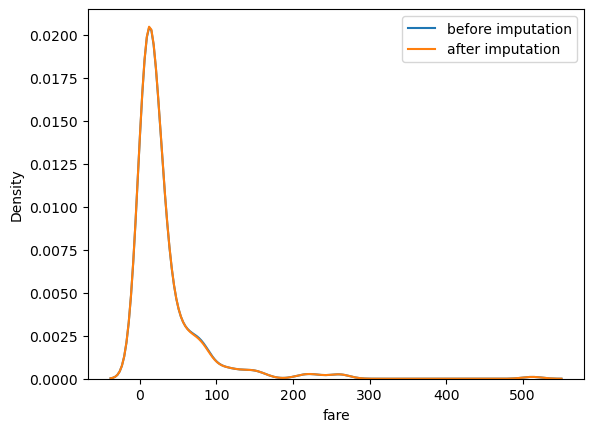

In [25]:
# distribution of fare column before and after removing the rows containing missing values in the embarked column

# plot the first kde plot
sns.kdeplot(data=test_df,x='fare',label='before imputation')

# plot the second kde plot
sns.kdeplot(data=embarked,x='fare',label='after imputation')

plt.legend()
plt.show()

## Drop missing rows of the age column

In [26]:
# drop the missing values from the age column

age = test_df.dropna(subset='age')

In [40]:
# proportion of values before removing missing values

s1 = test_df['embarked'].value_counts(normalize=True)
s1.name = 'Before Imputation'
s1

S    0.724409
C    0.188976
Q    0.086614
Name: Before Imputation, dtype: float64

In [41]:
# proportion of values after removing missing values

s2 = age['embarked'].value_counts(normalize=True)
s2.name = 'After Imputation'
s2

S    0.778090
C    0.182584
Q    0.039326
Name: After Imputation, dtype: float64

In [42]:
pd.concat([s1,s2],axis=1)

,Before Imputation,After Imputation
S,0.724409,0.778090
C,0.188976,0.182584
Q,0.086614,0.039326


**There is a significant change in the proprtion which states that CCA cannot be applied on the age column**

In [43]:
# proportion of values before removing missing values

s1 = test_df['pclass'].value_counts(normalize=True)
s1.name = 'Before Imputation'
s1

3    0.551066
1    0.242424
2    0.206510
Name: Before Imputation, dtype: float64

In [44]:
# proportion of values after removing missing values

s2 = age['pclass'].value_counts(normalize=True)
s2.name = 'After Imputation'
s2

3    0.497199
1    0.260504
2    0.242297
Name: After Imputation, dtype: float64

In [45]:
pd.concat([s1,s2],axis=1)

,Before Imputation,After Imputation
3,0.551066,0.497199
1,0.242424,0.260504
2,0.206510,0.242297


In [46]:
# proportion of values before removing missing values

s1 = test_df['sex'].value_counts(normalize=True)
s1.name = 'Before Imputation'
s1

male      0.647587
female    0.352413
Name: Before Imputation, dtype: float64

In [47]:
# proportion of values after removing missing values

s2 = age['sex'].value_counts(normalize=True)
s2.name = 'After Imputation'
s2

male      0.634454
female    0.365546
Name: After Imputation, dtype: float64

In [48]:
pd.concat([s1,s2],axis=1)

,Before Imputation,After Imputation
male,0.647587,0.634454
female,0.352413,0.365546


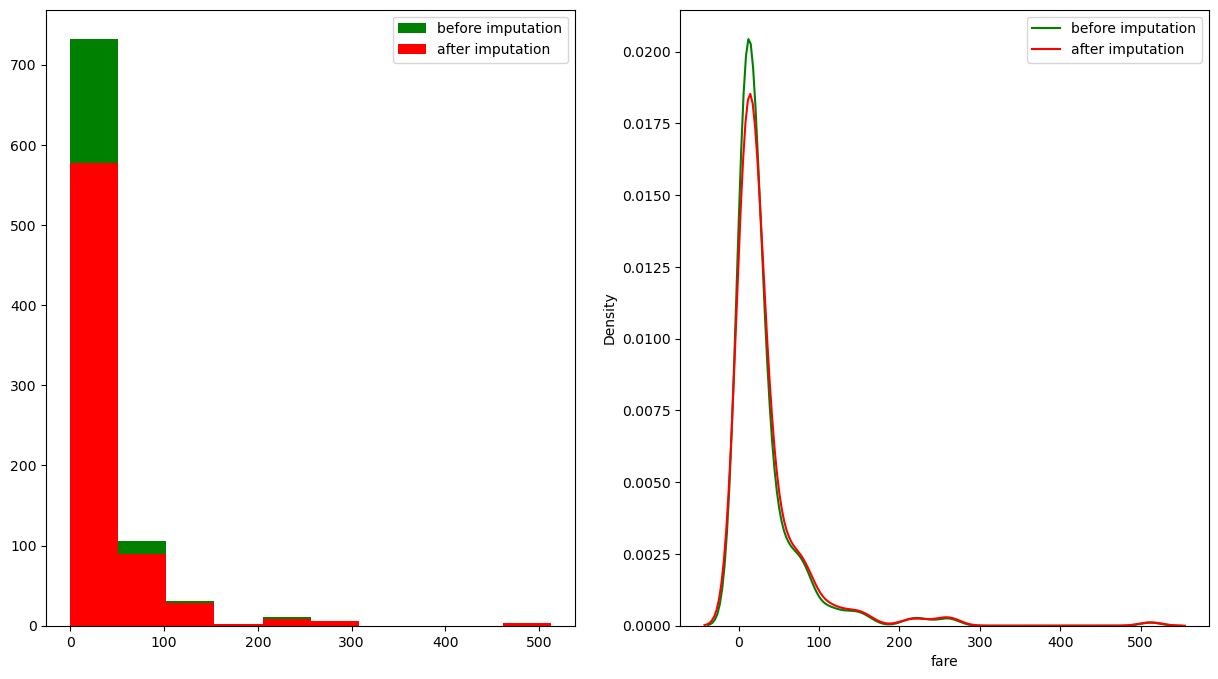

In [49]:
# distribution of the fare column 

fig,ax = plt.subplots(1,2,figsize=(15,8))

# plot the histogram

ax[0].hist(test_df['fare'],bins=10,color='green',label='before imputation')
ax[0].hist(age['fare'],bins=10,color='red',label='after imputation')
ax[0].legend()


# plot the kde plot
sns.kdeplot(test_df['fare'],color='green',label='before imputation',ax=ax[1])
sns.kdeplot(age['fare'],color='red',label='after imputation',ax=ax[1])     
ax[1].legend()

plt.show()

**There is a substantial change in the distribution of data in the are column which means that we cannot apply the CCA technique in this kind of scenario**